# Loading Data Using Herbie
See Herbie documentation: [Herbie](https://herbie.readthedocs.io/en/2024.3.0/user_guide/install.html)


In [2]:
from herbie import Herbie, wgrib2

import matplotlib.pyplot as plt

from cartopy import crs as ccrs, feature as cfeature
import csv
import pandas as pd
import numpy as np


In [3]:
H = Herbie(
    "2021-07-19",
    model="hrrr",
    product="sfc",
    fxx=0,
)

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2021-Jul-19 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


In [4]:
H.PRODUCTS

{'sfc': '2D surface level fields; 3-km resolution',
 'prs': '3D pressure level fields; 3-km resolution',
 'nat': 'Native level fields; 3-km resolution',
 'subh': 'Subhourly grids; 3-km resolution'}

In [5]:
ds = H.xarray("TMP:2 m above")
ds

c:\Users\joebe\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


<xarray.Dataset>
Dimensions:              (y: 1059, x: 1799)
Coordinates:
    time                 datetime64[ns] 2021-07-19
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 2.0
    latitude             (y, x) float64 21.14 21.15 21.15 ... 47.86 47.85 47.84
    longitude            (y, x) float64 237.3 237.3 237.3 ... 299.0 299.0 299.1
    valid_time           datetime64[ns] 2021-07-19
    gribfile_projection  object None
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 295.3 295.3 295.3 ... 287.8 287.7 287.6
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              C:\Users\joebe\data\hrrr\20210719\subset_6eeffd5...
    search:                  TMP:2 m above

In [6]:
# Gather latitude and longitude values for each hurricane track
points = []
currHur = ''
hur = {'latitude': [], 'longitude': [], 'time': []}
with open('filtered_data.csv', 'r') as f_in:
    reader = csv.reader(f_in)
    next(reader)
    for line in reader:
        while len(line[4]) < 4: line[4] = '0' + line[4]
        if currHur != line[0]:
            currHur = line[0]
            currTime = pd.to_datetime(line[3] + line[4],format='%Y%m%d%H%M')

            points.append(pd.DataFrame(hur))
            hur = {
                'latitude': [float(line[7])],
                'longitude': [float(line[8])],
                'time': [(pd.to_datetime(line[3] + line[4],format='%Y%m%d%H%M') - currTime)/pd.Timedelta('1 hour')]
                }
        else:
            hur['latitude'].append(float(line[7]))
            hur['longitude'].append(float(line[8]))
            hur['time'].append((pd.to_datetime(line[3] + line[4],format='%Y%m%d%H%M') - currTime)/pd.Timedelta('1 hour'))

points.pop(0)
points[0]

,latitude,longitude,time
0,21.4,-71.6,0.0
1,21.8,-71.9,2.0
2,22.7,-72.5,6.0
3,24.1,-73.1,12.0
4,25.4,-73.5,18.0
5,26.8,-73.6,24.0
6,28.5,-73.6,30.0
7,30.5,-73.4,36.0
8,32.5,-73.2,42.0
9,34.2,-72.7,48.0


In [7]:
matched = []
for point in points:
    matched.append(ds.herbie.pick_points(point))

matched[0]

       latitude  longitude  time  point_grid_distance  grid_index  y_grid  \
point                                                                       
0          22.0      -61.2   0.0          1061.082472      280643     155   
1          22.7      -62.4   6.0           918.386171      300432     166   
2          23.5      -63.3  12.0           801.575674      332814     184   
3          24.3      -64.0  18.0           704.644339      370593     205   
4          25.1      -64.5  24.0           627.334927      411970     228   
5          26.0      -65.0  30.0           546.795128      458744     254   
12         33.6      -61.9  66.0           529.444115     1003841     557   

       x_grid  latitude_grid  longitude_grid  
point                                         
0        1798      25.022526      288.926129  
1        1798      25.299844      289.016762  
2        1798      25.754083      289.166383  
3        1798      26.284699      289.343027  
4        1798      26.86

<xarray.Dataset>
Dimensions:              (point: 15)
Coordinates:
    time                 datetime64[ns] 2021-07-19
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 2.0
    latitude             (point) float64 21.54 21.84 22.7 ... 38.1 39.74 41.72
    longitude            (point) float64 287.8 287.9 287.5 ... 293.1 294.7 295.6
    valid_time           datetime64[ns] 2021-07-19
    gribfile_projection  object None
    point_grid_distance  (point) float64 60.95 18.92 1.281 ... 1.544 111.3 274.9
    point_latitude       (point) float64 21.4 21.8 22.7 24.1 ... 38.1 39.4 40.8
    point_longitude      (point) float64 -71.6 -71.9 -72.5 ... -66.9 -64.1 -61.3
    point_time           (point) float64 0.0 2.0 6.0 12.0 ... 66.0 72.0 78.0
Dimensions without coordinates: point
Data variables:
    t2m                  (point) float32 301.8 301.8 301.3 ... 300.9 298.9 294.3
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              C:\Users\joebe\data\hrrr\20210719\subset_6eeffd5...
    search:                  TMP:2 m above

In [8]:
for i in range(len(matched)):
    matched[i] = matched[i].swap_dims({"point": "point_time"})

(-219013.017232625, 3460978.089089834, -1681795.275537492, 1341151.7247181772)

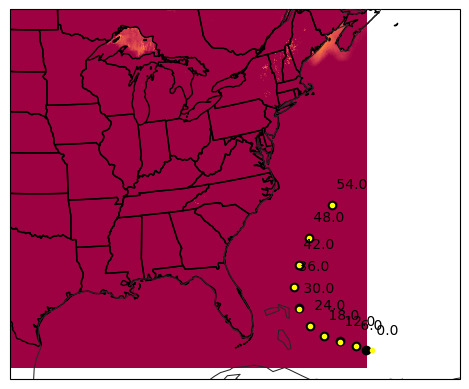

In [9]:
from herbie.toolbox import EasyMap, pc, ccrs

ax = EasyMap(crs=ds.herbie.crs).ax
ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.t2m,
    cmap="Spectral_r",
    vmax=290,
    vmin=270,
    transform=pc,
)

for i in matched[50].point_time:
    z = matched[10].sel(point_time=i)
    ax.scatter(z.longitude, z.latitude, color="k", transform=pc)
    ax.scatter(
        z.point_longitude, z.point_latitude, color="yellow", marker=".", transform=pc
    )
    ax.text(
        z.point_longitude,
        z.point_latitude,
        f" {z.point_time.item()}\n",
        transform=pc,
    )
ax.set_extent([-98, -65, 25, 45], crs=pc)
ax.add_feature(cfeature.STATES.with_scale('50m'))
ax.adjust_extent()

# Using Bounding Box to Create New Data

In [ ]:
from herbie import wgrib2
import os

dir = os.getcwd()
extent = (-97, -72, 25, 35)

H = Herbie(
    "2014-08-31 03:00",
    model="hrrr",
    product="sfc",
    fxx=0,
)



✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2014-Aug-31 03:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


In [ ]:
from herbie import Herbie
import xarray as xr
import numpy as np

# Define the extent (latitude and longitude bounds for the East Coast)
east_coast_extent = {
    "latitude": (25, 45),  # Latitude range (south, north)
    "longitude": (-97, -72),  # Longitude range (west, east)
}

# Initialize Herbie for the desired date and model
H = Herbie(
    date="2023-10-01",  # Specify the date
    model="hrrr",  # Specify the model (e.g., HRRR, GFS)
    product="sfc",  # Specify the product (e.g., surface level)
    fxx=0,  # Forecast hour
)

# Download the GRIB2 file (or read it directly into memory)
ds = H.xarray(":TMP:2 m above ground")  # Load a specific variable (e.g., 2m temperature)

# Inspect the dataset's coordinates
print(ds.coords)

# Convert longitude from 0-360 to -180-180 if necessary
longitude = ds.longitude.where(ds.longitude <= 180, ds.longitude - 360)

# Create a mask for the East Coast region
lat_mask = (ds.latitude >= east_coast_extent["latitude"][0]) & (ds.latitude <= east_coast_extent["latitude"][1])
lon_mask = (longitude >= east_coast_extent["longitude"][0]) & (longitude <= east_coast_extent["longitude"][1])
combined_mask = lat_mask & lon_mask

# Apply the mask to the dataset
ds_east_coast = ds.where(combined_mask, drop=True)


ds_east_coast.to_netcdf("east_coast_subset.nc")

# Print or visualize the subset
print(ds_east_coast)

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Oct-01 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
Coordinates:
    time                 datetime64[ns] 2023-10-01
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 2.0
    latitude             (y, x) float64 21.14 21.15 21.15 ... 47.86 47.85 47.84
    longitude            (y, x) float64 237.3 237.3 237.3 ... 299.0 299.0 299.1
    valid_time           datetime64[ns] 2023-10-01
    gribfile_projection  object None
<xarray.Dataset>
Dimensions:              (y: 839, x: 855)
Coordinates:
    time                 datetime64[ns] 2023-10-01
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 2.0
    latitude             (y, x) float64 25.02 25.02 25.02 ... 43.31 43.3 43.29
    longitude            (y, x) float64 262.9 262.9 263.0 ... 295.2 295.2 295.2
    valid_time           datetime64[ns] 2023-10-01
    gribfile_projection  object None
Dimensions without coordinates: y, x
Data variables:
  